In [1]:
# taken from https://gluon-cv.mxnet.io/build/examples_segmentation/demo_deeplab.html
# dataset description https://groups.csail.mit.edu/vision/datasets/ADE20K/, https://github.com/dmlc/gluon-cv/blob/master/gluoncv/data/ade20k/segmentation.py
# deeplab code https://github.com/dmlc/gluon-cv/blob/master/gluoncv/model_zoo/deeplabv3.py

In [2]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
import time
import numpy as np
import cv2 as cv
# using cpu
ctx = mx.cpu(0)

In [3]:
url = 'https://github.com/zhanghang1989/image-data/blob/master/encoding/' + \
    'segmentation/ade20k/ADE_val_00001755.jpg?raw=true'
filename = 'ade20k_example.jpg'
gluoncv.utils.download(url, filename, True)

14KB [00:00, 1560.01KB/s]             


'ade20k_example.jpg'

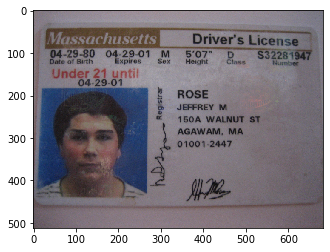

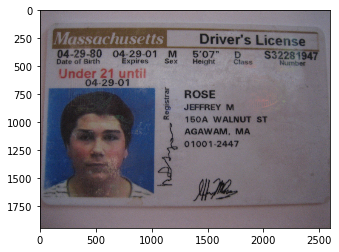

In [45]:
filename = '2017_12571467.jpg'

#from PIL import Image
#im = Image.open(file_name)
#im.resize(size, resample=0)


img = image.imread(filename)


if (img.shape[0] > 512) and (img.shape[1] > 512):
    shapes = [img.shape[0], img.shape[1]]
    min_dim = shapes.index(min(shapes))
    max_dim = shapes.index(max(shapes))
    ratio = min(shapes) / 512
    other_shape = max(shapes)/ ratio
    new_size = [0, 0]
    new_size[min_dim] = 512
    new_size[max_dim] = int(other_shape)
    img = image.imresize(img, new_size[1], new_size[0])

from matplotlib import pyplot as plt
plt.imshow(img.asnumpy())
plt.show()


resized_image = image.imresize(img, shapes[1], shapes[0])
plt.imshow(resized_image.asnumpy())
plt.show()

In [47]:
new_im1 = Image.fromarray(img.asnumpy())
new_im1.save('test_resized_im.png')

In [5]:
from gluoncv.data.transforms.presets.segmentation import test_transform
print(img.shape)
img = test_transform(img, ctx)
print(img.shape)

(512, 682, 3)
(1, 3, 512, 682)


In [6]:
model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)


In [7]:
output = model.predict(img)

In [ ]:
start = time.time()
predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
end = time.time()
print(end-start)

In [8]:
start = time.time()

test1 = mx.nd.squeeze(mx.nd.topk(output, axis=1, ret_typ='indices')).asnumpy()
end = time.time()
print(end-start)
print(test1.shape)
print(predict.shape)

26.313074350357056
(512, 682)


NameError: name 'predict' is not defined

In [ ]:
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask = get_color_pallete(test1, 'ade20k')
mask.save('output.png')

In [ ]:
mmask = mpimg.imread('output.png')
plt.imshow(mmask)
plt.show()

In [9]:
import numpy as np

def find_class_name(x):
    # ADE dataset classes # numbered from 1!
    CLASSES = ("wall", "building, edifice", "sky", "floor, flooring", "tree",
               "ceiling", "road, route", "bed", "windowpane, window", "grass",
               "cabinet", "sidewalk, pavement",
               "person, individual, someone, somebody, mortal, soul",
               "earth, ground", "door, double door", "table", "mountain, mount",
               "plant, flora, plant life", "curtain, drape, drapery, mantle, pall",
               "chair", "car, auto, automobile, machine, motorcar",
               "water", "painting, picture", "sofa, couch, lounge", "shelf",
               "house", "sea", "mirror", "rug, carpet, carpeting", "field", "armchair",
               "seat", "fence, fencing", "desk", "rock, stone", "wardrobe, closet, press",
               "lamp", "bathtub, bathing tub, bath, tub", "railing, rail", "cushion",
               "base, pedestal, stand", "box", "column, pillar", "signboard, sign",
               "chest of drawers, chest, bureau, dresser", "counter", "sand", "sink",
               "skyscraper", "fireplace, hearth, open fireplace", "refrigerator, icebox",
               "grandstand, covered stand", "path", "stairs, steps", "runway",
               "case, display case, showcase, vitrine",
               "pool table, billiard table, snooker table", "pillow",
               "screen door, screen", "stairway, staircase", "river", "bridge, span",
               "bookcase", "blind, screen", "coffee table, cocktail table",
               "toilet, can, commode, crapper, pot, potty, stool, throne",
               "flower", "book", "hill", "bench", "countertop",
               "stove, kitchen stove, range, kitchen range, cooking stove",
               "palm, palm tree", "kitchen island",
               "computer, computing machine, computing device, data processor, "
               "electronic computer, information processing system",
               "swivel chair", "boat", "bar", "arcade machine",
               "hovel, hut, hutch, shack, shanty",
               "bus, autobus, coach, charabanc, double-decker, jitney, motorbus, "
               "motorcoach, omnibus, passenger vehicle",
               "towel", "light, light source", "truck, motortruck", "tower",
               "chandelier, pendant, pendent", "awning, sunshade, sunblind",
               "streetlight, street lamp", "booth, cubicle, stall, kiosk",
               "television receiver, television, television set, tv, tv set, idiot "
               "box, boob tube, telly, goggle box",
               "airplane, aeroplane, plane", "dirt track",
               "apparel, wearing apparel, dress, clothes",
               "pole", "land, ground, soil",
               "bannister, banister, balustrade, balusters, handrail",
               "escalator, moving staircase, moving stairway",
               "ottoman, pouf, pouffe, puff, hassock",
               "bottle", "buffet, counter, sideboard",
               "poster, posting, placard, notice, bill, card",
               "stage", "van", "ship", "fountain",
               "conveyer belt, conveyor belt, conveyer, conveyor, transporter",
               "canopy", "washer, automatic washer, washing machine",
               "plaything, toy", "swimming pool, swimming bath, natatorium",
               "stool", "barrel, cask", "basket, handbasket", "waterfall, falls",
               "tent, collapsible shelter", "bag", "minibike, motorbike", "cradle",
               "oven", "ball", "food, solid food", "step, stair", "tank, storage tank",
               "trade name, brand name, brand, marque", "microwave, microwave oven",
               "pot, flowerpot", "animal, animate being, beast, brute, creature, fauna",
               "bicycle, bike, wheel, cycle", "lake",
               "dishwasher, dish washer, dishwashing machine",
               "screen, silver screen, projection screen",
               "blanket, cover", "sculpture", "hood, exhaust hood", "sconce", "vase",
               "traffic light, traffic signal, stoplight", "tray",
               "ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, "
               "dustbin, trash barrel, trash bin",
               "fan", "pier, wharf, wharfage, dock", "crt screen",
               "plate", "monitor, monitoring device", "bulletin board, notice board",
               "shower", "radiator", "glass, drinking glass", "clock", "flag")
    return CLASSES[x]


def create_mask_segments(prediction):
    # Get unique possible values
    unique_val = np.unique(prediction)
    list_masks_dec = []
    list_masks_rgb = []
    list_class = []
    for x in np.nditer(unique_val):
        list_class.append(find_class_name(int(x)))
        #new_mask = np.zeros((prediction.shape[0], prediction.shape[1], 3))
        # Where we find the value, we set it to 1 to become white.
        #idx_mask = np.where(prediction == x)
        masked_im_dec = (np.where(prediction == x, 0.99, 0))
        masked_im_rgb = (np.where(prediction == x, 255, 0))
        #print(masked_im)
        new_mask_dec = np.repeat(masked_im_dec[:, :, np.newaxis], 3, axis=2) # np.expand_dims(masked_im, axis=2)
        new_mask_rgb = np.repeat(masked_im_rgb[:, :, np.newaxis], 3, axis=2)
        #print(new_mask)
        list_masks_dec.append(new_mask_dec)
        list_masks_rgb.append(new_mask_rgb)
    return list_masks_dec, list_masks_rgb, list_class

In [10]:
new_im_dec, new_im_rgb, list_class = (create_mask_segments(test1))

In [11]:
from PIL import Image
new_im1 = Image.fromarray(new_im_rgb[1].astype('uint8'))
new_im1.save('test_mask_output.png')

In [12]:
new_im1_cv = cv.cvtColor(np.array(new_im1), cv.COLOR_RGB2BGR)
imgray = cv.cvtColor(new_im1_cv, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [13]:
im = cv.imread('test_mask_output.png')

imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


In [39]:
#print(contours[0])
print(len(contours))


resized_contour = ([(x*ratio).astype(int) for x in contours])

1


In [ ]:
def visualize_image_contour(image, contour):
    print("TODO")

In [40]:
resized_contour
#contours

[array([[[ 508,  721]],
 
        [[ 504,  725]],
 
        [[ 482,  725]],
 
        [[ 478,  729]],
 
        [[ 459,  729]],
 
        [[ 455,  732]],
 
        [[ 440,  732]],
 
        [[ 436,  736]],
 
        [[ 425,  736]],
 
        [[ 421,  740]],
 
        [[ 410,  740]],
 
        [[ 406,  744]],
 
        [[ 391,  744]],
 
        [[ 387,  747]],
 
        [[ 368,  747]],
 
        [[ 364,  751]],
 
        [[ 349,  751]],
 
        [[ 345,  755]],
 
        [[ 334,  755]],
 
        [[ 330,  759]],
 
        [[ 326,  759]],
 
        [[ 322,  763]],
 
        [[ 318,  763]],
 
        [[ 315,  766]],
 
        [[ 311,  766]],
 
        [[ 303,  774]],
 
        [[ 299,  774]],
 
        [[ 292,  782]],
 
        [[ 288,  782]],
 
        [[ 273,  797]],
 
        [[ 269,  797]],
 
        [[ 235,  831]],
 
        [[ 235,  835]],
 
        [[ 227,  842]],
 
        [[ 227,  846]],
 
        [[ 216,  858]],
 
        [[ 216,  861]],
 
        [[ 212,  865]],
 
        [[ 2

In [41]:
resized_image_process = resized_image.asnumpy()

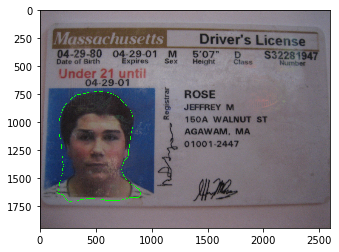

In [42]:
cv.drawContours(resized_image_process, resized_contour, -1, (0,255,0), 3)

plt.imshow(resized_image_process)
plt.show()

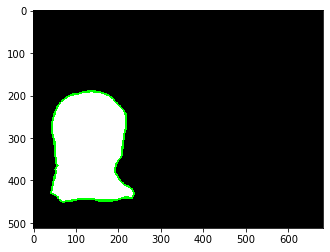

In [33]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
from matplotlib import pyplot as plt
plt.imshow(thresh)

cv.drawContours(new_im1_cv, contours, -1, (0,255,0), 3)

plt.imshow( new_im1_cv)
plt.show()

In [34]:
from shapely.geometry import Polygon

def contour_to_polygon(output_contours):
    list_polygon = []
    for contour in output_contours:
        contour = np.squeeze(contour)
        if len(contour) > 2:
            list_polygon.append(Polygon(contour))
    return list_polygon

In [35]:
def deeplab_pred_to_output(prediction, _plot=False):
    new_im_dec, new_im_rgb, list_class = (create_mask_segments(prediction))
    
    list_polygons = []
    for mask, class_name in zip(new_im_rgb, list_class):
        new_im1 = Image.fromarray(mask.astype('uint8'))
        new_im1_cv = cv.cvtColor(np.array(new_im1), cv.COLOR_RGB2BGR)
        imgray = cv.cvtColor(new_im1_cv, cv.COLOR_BGR2GRAY)
        ret, thresh = cv.threshold(imgray, 127, 255, 0)
        contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

        if _plot:
            plt.imshow(thresh)
            cv.drawContours(new_im1_cv, contours, -1, (0,255,0), 3)
            plt.imshow( new_im1_cv)
            plt.show()

        list_polygons.append((contour_to_polygon(contours), class_name))
    
    return list_polygons

In [ ]:
import numpy as np
#test_im = np.zeros((256,256,3)) # Black. Ones make white
plt.imshow(new_im[3])
plt.show()

In [ ]:
# ADE dataset classes # numbered from 1!
CLASSES = ("wall", "building, edifice", "sky", "floor, flooring", "tree",
               "ceiling", "road, route", "bed", "windowpane, window", "grass",
               "cabinet", "sidewalk, pavement",
               "person, individual, someone, somebody, mortal, soul",
               "earth, ground", "door, double door", "table", "mountain, mount",
               "plant, flora, plant life", "curtain, drape, drapery, mantle, pall",
               "chair", "car, auto, automobile, machine, motorcar",
               "water", "painting, picture", "sofa, couch, lounge", "shelf",
               "house", "sea", "mirror", "rug, carpet, carpeting", "field", "armchair",
               "seat", "fence, fencing", "desk", "rock, stone", "wardrobe, closet, press",
               "lamp", "bathtub, bathing tub, bath, tub", "railing, rail", "cushion",
               "base, pedestal, stand", "box", "column, pillar", "signboard, sign",
               "chest of drawers, chest, bureau, dresser", "counter", "sand", "sink",
               "skyscraper", "fireplace, hearth, open fireplace", "refrigerator, icebox",
               "grandstand, covered stand", "path", "stairs, steps", "runway",
               "case, display case, showcase, vitrine",
               "pool table, billiard table, snooker table", "pillow",
               "screen door, screen", "stairway, staircase", "river", "bridge, span",
               "bookcase", "blind, screen", "coffee table, cocktail table",
               "toilet, can, commode, crapper, pot, potty, stool, throne",
               "flower", "book", "hill", "bench", "countertop",
               "stove, kitchen stove, range, kitchen range, cooking stove",
               "palm, palm tree", "kitchen island",
               "computer, computing machine, computing device, data processor, "
               "electronic computer, information processing system",
               "swivel chair", "boat", "bar", "arcade machine",
               "hovel, hut, hutch, shack, shanty",
               "bus, autobus, coach, charabanc, double-decker, jitney, motorbus, "
               "motorcoach, omnibus, passenger vehicle",
               "towel", "light, light source", "truck, motortruck", "tower",
               "chandelier, pendant, pendent", "awning, sunshade, sunblind",
               "streetlight, street lamp", "booth, cubicle, stall, kiosk",
               "television receiver, television, television set, tv, tv set, idiot "
               "box, boob tube, telly, goggle box",
               "airplane, aeroplane, plane", "dirt track",
               "apparel, wearing apparel, dress, clothes",
               "pole", "land, ground, soil",
               "bannister, banister, balustrade, balusters, handrail",
               "escalator, moving staircase, moving stairway",
               "ottoman, pouf, pouffe, puff, hassock",
               "bottle", "buffet, counter, sideboard",
               "poster, posting, placard, notice, bill, card",
               "stage", "van", "ship", "fountain",
               "conveyer belt, conveyor belt, conveyer, conveyor, transporter",
               "canopy", "washer, automatic washer, washing machine",
               "plaything, toy", "swimming pool, swimming bath, natatorium",
               "stool", "barrel, cask", "basket, handbasket", "waterfall, falls",
               "tent, collapsible shelter", "bag", "minibike, motorbike", "cradle",
               "oven", "ball", "food, solid food", "step, stair", "tank, storage tank",
               "trade name, brand name, brand, marque", "microwave, microwave oven",
               "pot, flowerpot", "animal, animate being, beast, brute, creature, fauna",
               "bicycle, bike, wheel, cycle", "lake",
               "dishwasher, dish washer, dishwashing machine",
               "screen, silver screen, projection screen",
               "blanket, cover", "sculpture", "hood, exhaust hood", "sconce", "vase",
               "traffic light, traffic signal, stoplight", "tray",
               "ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, "
               "dustbin, trash barrel, trash bin",
               "fan", "pier, wharf, wharfage, dock", "crt screen",
               "plate", "monitor, monitoring device", "bulletin board, notice board",
               "shower", "radiator", "glass, drinking glass", "clock", "flag")

In [39]:
print(contours[0])

[[[134 190]]

 [[133 191]]

 [[127 191]]

 [[126 192]]

 [[121 192]]

 [[120 193]]

 [[116 193]]

 [[115 194]]

 [[112 194]]

 [[111 195]]

 [[108 195]]

 [[107 196]]

 [[103 196]]

 [[102 197]]

 [[ 97 197]]

 [[ 96 198]]

 [[ 92 198]]

 [[ 91 199]]

 [[ 88 199]]

 [[ 87 200]]

 [[ 86 200]]

 [[ 85 201]]

 [[ 84 201]]

 [[ 83 202]]

 [[ 82 202]]

 [[ 80 204]]

 [[ 79 204]]

 [[ 77 206]]

 [[ 76 206]]

 [[ 72 210]]

 [[ 71 210]]

 [[ 62 219]]

 [[ 62 220]]

 [[ 60 222]]

 [[ 60 223]]

 [[ 57 226]]

 [[ 57 227]]

 [[ 56 228]]

 [[ 56 229]]

 [[ 55 230]]

 [[ 55 231]]

 [[ 54 232]]

 [[ 54 233]]

 [[ 53 234]]

 [[ 53 236]]

 [[ 52 237]]

 [[ 52 239]]

 [[ 51 240]]

 [[ 51 242]]

 [[ 50 243]]

 [[ 50 245]]

 [[ 49 246]]

 [[ 49 248]]

 [[ 48 249]]

 [[ 48 250]]

 [[ 47 251]]

 [[ 47 254]]

 [[ 46 255]]

 [[ 46 260]]

 [[ 45 261]]

 [[ 45 291]]

 [[ 46 292]]

 [[ 46 297]]

 [[ 47 298]]

 [[ 47 300]]

 [[ 48 301]]

 [[ 48 303]]

 [[ 49 304]]

 [[ 49 307]]

 [[ 50 308]]

 [[ 50 315]]

 [[ 51

In [36]:
from PIL import Image
import cv2 as cv

list_polygons = deeplab_pred_to_output(test1)



In [37]:
print(list_polygons)

[([<shapely.geometry.polygon.Polygon object at 0x00000289A36AE2C8>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE488>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE408>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE448>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE4C8>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE3C8>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE648>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE688>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE6C8>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE508>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE608>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE788>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE7C8>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE808>, <shapely.geometry.polygon.Polygon object at 0x00000289A36AE848>, <shapely.geometry.poly

In [ ]:
import numpy as np
proba = np.exp(output[0, 0 , :, :])
print(proba.sum())

In [ ]:
import numpy as np
#print(type(np.asarray(output)))

In [ ]:
outputnp = output.asnumpy()
print(type(outputnp))
print(outputnp.shape)

In [ ]:
proba = np.exp(-outputnp[0, :, 0, 0])
print(proba.sum())
print(proba)

In [ ]:
outputnp[0, :, 0, 0].shape

In [ ]:
outputnp[0, :, 0, 0]

In [ ]:
print(output[0, :, 0, 0].shape)

In [ ]:
print(output[0, :, 0, 0].softmax().asnumpy().sum())

In [ ]:
t = output.softmax().asnumpy()

In [30]:
import time
start = time.time()
te = np.apply_along_axis(softmax, 1, output.asnumpy())
end = time.time()
print(end - start)

5.707611083984375


In [29]:
start = time.time()
print(output.shape)
proba = mx.nd.exp(output).asnumpy()
print(proba.shape)
dividend = np.expand_dims(np.reciprocal(np.sum(proba, axis = 1)), axis=1)
print(dividend.shape)
dividend = np.repeat(dividend, output.shape[1], axis = 1)
print(dividend.shape)
proba = np.multiply(proba, dividend)
end = time.time()
print(end - start)

(1, 150, 512, 682)
(1, 150, 512, 682)
(1, 1, 512, 682)
(1, 150, 512, 682)
0.8650157451629639


In [ ]:
print(te[0, :, 5, 0].sum())
print(proba[0, :, 5, 0].sum())
print(te)

print(proba)

In [ ]:
proba = mx.nd.exp(pred).asnumpy()
            dividend = np.sum(pred.asnumpy(), axis = 1)
            dividend = np.repeat(dividend, axis = 1)
            proba = proba

            proba = np.apply_along_axis(softmax, 1, pred.asnumpy())

In [28]:
def softmax(x):
    """
    Compute softmax values for each sets of scores in x.
    
    Rows are scores for each class. 
    Columns are predictions (samples).
    """
    scoreMatExp = np.exp(x)
    return scoreMatExp / scoreMatExp.sum(0)

In [ ]:
print(te[0, :, 5, 0].sum())

In [ ]:
mx.nd.apply_along_axis(output)